# Get metadata

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = Path.cwd().parent / "data"
metadata_df = pd.read_parquet(data_dir / "processed/vasr/metadata.parquet")
mapping_df = pd.read_json(data_dir / "processed/vasr/mapping.json", dtype={"id": str, "shard": str})
df = metadata_df.merge(mapping_df, on=["id", "shard", "split"])
df

,id,shard,split,fps,sampling_rate,transcript,video_num_frames,audio_num_frames,channel,video,topic
0,0070925,001,valid,25,16000,thành ra ở giêng nó vẫn hỏi hay hơn vậy thì mì...,76,48000,nguyenquynhnaricantho,730979009993428507400000-84-87,storytelling
1,0063053,001,valid,25,16000,một á là chúng ta sẽ sử dụng da mi trên để mà ...,76,48000,nguyenquynhnaricantho,724976718687981082100016-8-11,storytelling
2,0076991,001,valid,25,16000,là những đôi mắt có những cái độ xập xệ những ...,76,48000,nguyenquynhnaricantho,721226360185007644300006-4-7,storytelling
3,0123846,001,train,25,16000,họ phải là nó chuẩn ai cũng sợ hết,76,48000,baothanhnien.official,730225575020044622600005-5-8,news
4,0063937,001,valid,25,16000,thì mình phải chọn một người đàn ông thật là t...,76,48000,nguyenquynhnaricantho,722692287566659917000002-2-5,storytelling
...,...,...,...,...,...,...,...,...,...,...,...
1254380,0220647,200,train,25,16000,tử tế niềm vui và hạnh phúc đến với,76,48000,lifecoachtuean,726858208965252224200001-40-43,storytelling
1254381,0220804,200,train,25,16000,hoài là không có ai quan tâm đến bạn ngoài anh ta,76,48000,lifecoachtuean,703374814094352716900000-29-32,storytelling
1254382,0194363,200,train,25,16000,làm mẹ nhưng vẫn chưa được ở ngoài ấy rất nhiều,76,48000,tamtinhmebim.mcv,718576990105792025800037-2-5,occultism
1254383,0139143,200,train,25,16000,đang kết kỉnh giống như ở trên trang đứa phân ...,76,48000,genz.justdoit,725146313466005427300000-2-5,other


## Get split

In [ ]:
split = "train"
df = df[df["split"] == split]
df

## Get training subset

In [4]:
hour = 100
manifest_file = data_dir / f"processed/vasr/{hour}h/train.tsv"
subset_ids = []
with open(manifest_file, "r") as f:
    _ = f.readline()
    for line in f:
        subset_ids.append(line.split()[0].split("-")[0])
df = df[df["id"].isin(subset_ids)]
df

,id,shard,split,fps,sampling_rate,transcript,video_num_frames,audio_num_frames,channel,video,topic
8,0017052,001,train,25,16000,có ai yêu mãi một người em ơi nghe mày á,76,48000,behomethansohoc7,720284826925546217100000-44-47,occultism
13,0036930,001,train,25,16000,hà vinh để điều tra về hành vi mua bán người d...,76,48000,thvl24news,717944837712018150600000-16-19,news
26,0020315,001,train,25,16000,thì cái này nó sẽ dành cho những bạn nào mà mình,76,48000,behomethansohoc7,714346487043909557800000-30-33,occultism
29,0021589,001,train,25,16000,bài tháng ăn học sinh của em không có những co...,76,48000,behomethansohoc7,718354414767500828300000-22-25,occultism
34,0010580,001,train,25,16000,phán đoán tình huống giải quyết công việc cảm ...,76,48000,behomethansohoc7,714234178739754114700000-4-7,occultism
...,...,...,...,...,...,...,...,...,...,...,...
1254321,0165434,200,train,25,16000,ý là không có vịt nhưng mà khi mình nói trong ...,76,48000,tuan_linh912k,717513392798255029800002-2-5,occultism
1254332,0138996,200,train,25,16000,không có nhờ sự hỗ trợ kinh tế của bên gia,76,48000,genz.justdoit,713361273785840768200020-0-3,other
1254335,0153777,200,train,25,16000,tóp năm cái bộ phim kinh dị về tình yêu,76,48000,tuan_linh912k,699701643770965532300000-0-3,occultism
1254349,0177498,200,train,25,16000,quỳnh phải cần lộ liễu mà cừng ngay ngắn vậy a...,76,48000,tamtinhmebim.mcv,690154841854024422600012-2-5,occultism


# Plot pie chart

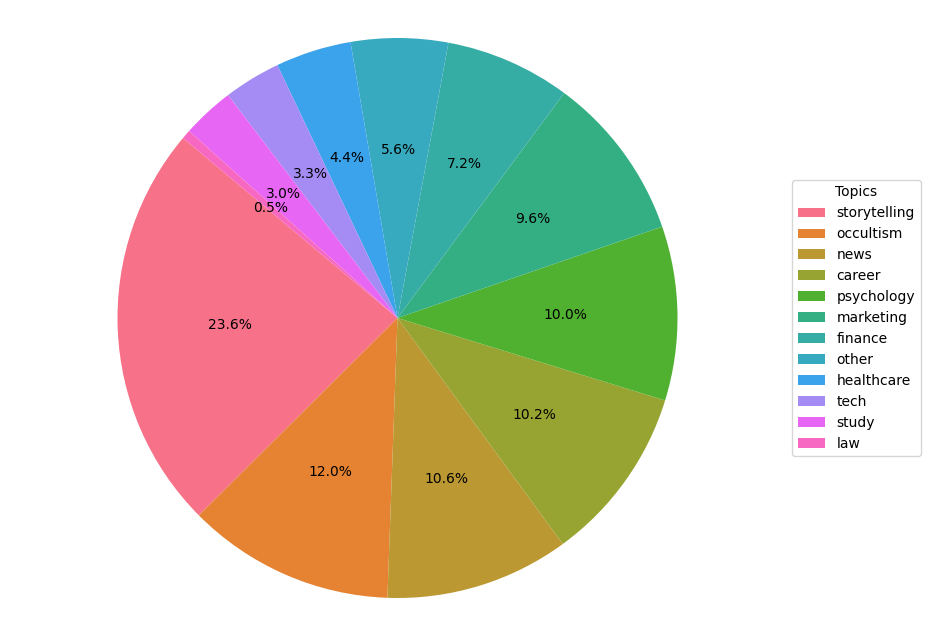

In [6]:
topic_counts = df["topic"].value_counts(dropna=False)

colors = sns.color_palette("husl", len(topic_counts))
labels = topic_counts.index.tolist()
sizes = topic_counts.values.tolist()

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct="%1.1f%%", startangle=140)
ax.legend(wedges, labels, title="Topics", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis("equal")

plt.show()